In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from graphviz import Digraph

## 1. graphviz

First we adapt **graphviz** to graph visualization. It allows us to manually input dot and edges to form a graph and then use render method to visualize the image.

In [2]:
dot = Digraph()
dot.node('A', 'A')
dot.node('B', 'B')
dot.node('C', 'C')
dot.edges(['AB', 'BC', 'BA', 'CB'])
print(dot.source)

digraph {
	A [label=A]
	B [label=B]
	C [label=C]
	A -> B
	B -> C
	B -> A
	C -> B
}


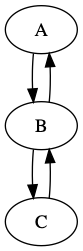

In [3]:
from IPython.display import display, Image
dot.format = 'png'
Image(dot.render('output-graph.gv'))

Additionally, we can use the following method for the node and edges operation

In [4]:
dot.edge('A','B')

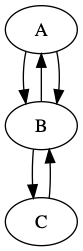

In [5]:
Image(dot.render('output-graph.gv'))

Clearly another edges are created from A to B.

In [6]:
# .gv file is a dot source file
#  it generates a output-graph.gv.png at the same time
# view param suggests if the file is opened when it is created
dot.render('output-graph.gv', view=True)

'output-graph.gv.png'

# 2. networkx

In addition to manually input data, we can consider use networkx to generate .dot file. Another advantage is that networkx has more useful methods in graph operations. This enables the such graph visualzation to a more generation use cases

In [7]:
G = nx.DiGraph()

In [8]:
G.add_node('A')

In [9]:
G.add_nodes_from(['B','C']),
G.add_edge('A','B')
G.add_edge('B','A')
G.add_edges_from(['BC','CB'])

In [10]:
G.add_edges_from([('A','C')])
G.edges

OutEdgeView([('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'B')])

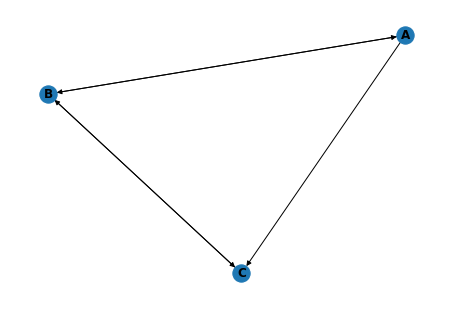

In [11]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [12]:
dot2 = nx.nx_agraph.graphviz_layout(G)

In [13]:
dot2 = nx.nx_agraph.to_agraph(G)

In [14]:
dot2.write('dot2.dot')

In [15]:
dot3 = nx.nx_agraph.read_dot('dot2.dot')
dot3.edges

OutEdgeView([('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'B')])

In [16]:
pydot = Digraph()
for node in dot3.nodes:
    pydot.node(node,node)
for edge in list(dot3.edges(data=True)):
    pydot.edge(edge[0],edge[1])

In [17]:
print(pydot.source)

digraph {
	A [label=A]
	B [label=B]
	C [label=C]
	A -> B
	A -> C
	B -> A
	B -> C
	C -> B
}


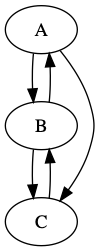

In [18]:
pydot.format = 'png'
Image(pydot.render('output2-graph.gv'))